In [2]:
import os

import time
import multiprocessing
from nltk.corpus.reader.wordlist import WordListCorpusReader

from jgtextrank import keywords_extraction, keywords_extraction_from_corpus_directory
# load custom stop list
# The SMART stop-word list built by Chris Buckley and Gerard Salton, 
#   which can be obtained from http://www.lextek.com/manuals/onix/stopwords2.html
reader = WordListCorpusReader('../resource', 'smart-stop-list.txt')
stop_list = reader.words()

# Keywords extraction from text

In [2]:
example_abstract = "Compatibility of systems of linear constraints over the set of natural numbers. " \
                           "Criteria of compatibility of a system of linear Diophantine equations, strict inequations, " \
                           "and nonstrict inequations are considered. Upper bounds for components of a minimal set of " \
                           "solutions and algorithms of construction of minimal generating sets of solutions for all " \
                           "types of systems are given. These criteria and the corresponding algorithms for " \
                           "constructing a minimal supporting set of solutions can be used in solving all the " \
                           "considered types systems and systems of mixed types."
example_abstract_results, example_abstract_top_vertices = keywords_extraction(example_abstract, top_p = 0.3, lemma=True)
print("Keywords: \n")
print(example_abstract_results)        
print("\nTop T vertices: \n")
print(example_abstract_top_vertices)

Keywords: 

[('system', 0.09086), ('set', 0.07817), ('algorithm', 0.06389), ('minimal', 0.05848), ('type system', 0.04543), ('minimal set', 0.03909), ('linear constraint', 0.03808), ('corresponding algorithm', 0.03194), ('minimal supporting set', 0.02606), ('linear diophantine equation', 0.02539), ('nonstrict inequations', 0.02532), ('strict inequations', 0.02532)]

Top T vertices: 

[('system', 0.0908645423181641), ('set', 0.07817233752963601), ('linear', 0.07616116083873783), ('algorithm', 0.06388902339459528), ('equation', 0.05958796210456059), ('minimal', 0.0584758714284493), ('inequations', 0.05063519065290718)]


In [3]:
example_text_2 = "Information extraction is the process of extracting structured data from unstructured text, " \
                     "which is relevant for several end-to-end tasks, including question answering. " \
                     "This paper addresses the tasks of named entity recognition (NER), " \
                     "a subtask of information extraction, using conditional random fields (CRF). " \
                     "Our method is evaluated on the ConLL-2003 NER corpus."

example_text_2_results, example_text_2_top_vertices = keywords_extraction(example_text_2, top_p = 0.3)
print("Keywords: \n")
print(example_text_2_results)        
print("\nTop T vertices: \n")
print(example_text_2_top_vertices)

Keywords: 

[('ner', 0.06606), ('unstructured text', 0.03402), ('information extraction', 0.03402), ('entity recognition', 0.02478), ('question answering', 0.02331), ('several end-to-end tasks', 0.0228), ('conditional random fields', 0.0228), ('conll-2003 ner corpus', 0.02202)]

Top T vertices: 

[('fields', 0.06838897289220543), ('several', 0.06838897289220541), ('unstructured', 0.06803744076574295), ('information', 0.06803744076574295), ('ner', 0.06606131438462487), ('recognition', 0.04955684571284008), ('question', 0.04662004662004661)]


# Custom context window size

Co-occurrence graph is build with default context windows size 2. A different window size can be set.

In [4]:
# set to a larger context window size
example_results_with_custom_ctx_size, example_abstract_top_vertices = keywords_extraction(example_abstract, window=5, 
                                                                                          top_p = 0.3, lemma=True)
print("Keywords with context window size(=5) :", example_results_with_custom_ctx_size)

Keywords with context window size(=5) : [('set', 0.09375), ('system', 0.08144), ('minimal', 0.06128), ('algorithm', 0.05927), ('solution', 0.05823), ('minimal set', 0.04688), ('type system', 0.04072), ('linear constraint', 0.03249), ('minimal supporting set', 0.03125), ('corresponding algorithm', 0.02964), ('nonstrict inequations', 0.0259), ('strict inequations', 0.0259), ('linear diophantine equation', 0.02166)]


# Custom syntactic filters

In [5]:
# custom syntactic filters to include verbs
custom_categories = {'NNS', 'NNP', 'NN', 'JJ', 'VBZ'}

# custom stop words filters
stop_words={'set', 'mixed', 'corresponding', 'supporting'}

# extract keywords from all vertices connections
results_with_custom_filters, example_top_vertices = keywords_extraction(example_abstract, top_p = 1, 
                                                                        syntactic_categories = custom_categories, 
                                                                        stop_words = stop_words,
                                                                        lemma=True)
print("Keywords result with custom filters: ", results_with_custom_filters)

Keywords result with custom filters:  [('system', 0.08862), ('algorithm', 0.06491), ('construction', 0.06491), ('compatibility', 0.0512), ('type system', 0.04431), ('linear constraint', 0.04269), ('component', 0.03851), ('upper bound', 0.03649), ('solution', 0.03509), ('minimal', 0.03509), ('criterion', 0.02926), ('linear diophantine equation', 0.02846), ('nonstrict inequations', 0.0272), ('strict inequations', 0.0272), ('type', 0.02633), ('natural number', 0.025)]


# Custom co-occurrence context

'jgTextRank' build word co-occurrences from sentential context by default. Depending on specific corpus and hypothesis, the word co-occurrence context can also be within a paragraph, section, adjacent sentences, current document or any specific semantic frames from text.

Co-occurrence context can be customised in 'jgTextRank'. Following simple example shows how to extract keywords from pre-segmented corpus context.

In [6]:
from jgtextrank.core import keywords_extraction_from_segmented_corpus
# the "example context" is segmented into a list of 3 separate context
# see also 'keywords_extraction_from_tagged_corpus' for pre-segmented and pre-tagged corpus as input
example_user_defined_context_corpus = [["Compatibility", "of", "systems", "of", "linear", "constraints",
                                             "over", "the", "set", "of", "natural", "numbers",".",
                                             "Criteria", "of", "compatibility", "of", "a", "system", "of",
                                             "linear", "Diophantine", "equations", ",", "strict", "inequations", ",",
                                             "and", "nonstrict", "inequations", "are", "considered", "."],
                                            ["Upper", "bounds", "for", "components", "of", "a", "minimal", "set",
                                             "of", "solutions", "and","algorithms","of", "construction", "of",
                                             "minimal", "generating", "sets", "of", "solutions", "for", "all",
                                             "types", "of", "systems", "are", "given", "."],
                                            ["These", "criteria", "and", "the", "corresponding", "algorithms",
                                             "for", "constructing", "a", "minimal", "supporting", "set", "of",
                                             "solutions", "can", "be", "used", "in", "solving", "all", "the",
                                             "considered", "types", "systems", "and", "systems", "of", "mixed",
                                             "types","."]]
results_with_custom_context, top_vertices = keywords_extraction_from_segmented_corpus(example_user_defined_context_corpus,
                                                                                      top_p=1)
print("keywords from custom corpus context:", results_with_custom_context)
print("\ntop vertices from custom corpus context: ", top_vertices)

keywords from custom corpus context: [('systems', 0.07966), ('minimal', 0.06362), ('set', 0.06357), ('algorithms', 0.05397), ('solutions', 0.04971), ('linear constraints', 0.04358), ('types systems', 0.03983), ('criteria', 0.03784), ('compatibility', 0.03606), ('construction', 0.03525), ('types', 0.03475), ('sets', 0.03404), ('minimal set', 0.03181), ('linear diophantine equations', 0.02905), ('corresponding algorithms', 0.02699), ('nonstrict inequations', 0.02315), ('strict inequations', 0.02315), ('system', 0.02125), ('minimal supporting set', 0.02121), ('natural numbers', 0.01892), ('mixed types', 0.01737), ('upper', 0.00644), ('components', 0.00644)]

top vertices from custom corpus context:  [('linear', 0.08715654349301856), ('systems', 0.07965749153852081), ('minimal', 0.06361746451217092), ('set', 0.06357313390850973), ('equations', 0.054514709369873425), ('algorithms', 0.05397157445263069), ('solutions', 0.04970626750653032), ('inequations', 0.04629742641455432), ('strict', 0.0

# Visual Analytics of Co-occurrence Graph

'jgTextRank' supports various different custom settings including syntactic filters, stopwords, top T vertices, context window size, building co-occurrence connections from either original context text or filtered context, pageRank solver, and so forth. It would be a good idea to gain insights from visual analysis of the corresponding co-occurrence graph with actual samples.

Following code presents a simple example of how to visualise co-occurrence graph from your sample text.

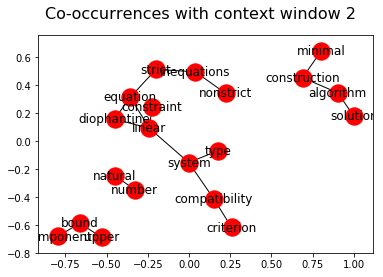

In [11]:
from jgtextrank.core import preprocessing, build_cooccurrence_graph
import networkx as nx
import matplotlib.pyplot as plt

preprocessed_context = preprocessing(example_abstract, syntactic_categories = custom_categories, 
                                     stop_words = stop_words, lemma=True)

cooccurrence_graph, original_tokenised_context = build_cooccurrence_graph(preprocessed_context)
pos = nx.spring_layout(cooccurrence_graph,k=0.20,iterations=20)
nx.draw_networkx(cooccurrence_graph, pos=pos, arrows=True, with_labels=True)
plt.suptitle('Co-occurrences with context window 2', fontsize=16)
plt.show()

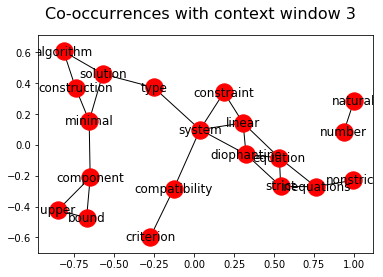

In [23]:
# set to a larger context size
preprocessed_context = preprocessing(example_abstract, syntactic_categories = custom_categories, 
                                     stop_words = stop_words, lemma=True)

cooccurrence_graph, original_tokenised_context = build_cooccurrence_graph(preprocessed_context, window=3)
pos = nx.spring_layout(cooccurrence_graph,k=0.20,iterations=20)
nx.draw_networkx(cooccurrence_graph, pos=pos, arrows=True, with_labels=True)
plt.suptitle('Co-occurrences with context window 3', fontsize=16)
plt.show()

# Algorithms for Vertex Ranking

The vertex ranking is the key to identify patterns in graph based term extraction algorithms. The core of TextRank relies on pagerank algorithm to weight vertices in order to locate crucial nodes in a co-occurrence network. jgTextRank support 4 variations of pagerank implementation supported in networkx library and 14 additional graph ranking algorithms.

PageRank implementations:

* **'pagerank'**: networkx implementation of pagerank
* **'pagerank_numpy'**: numpy implementation of pagerank
* **'pagerank_scipy'**: scipy implementation of pagerank

Additional graph ranking algorithms:

* **'betweenness_centrality'**: compute the shortest-path betweenness centrality of a node
* **'degree_centrality'**: Compute the degree centrality for nodes.
* **'hits'**: compute HITS algorithm for a node. The avg. of Authority value and Hub value is computed
* **'closeness_centrality'**: Compute closeness centrality for nodes.
* **'edge_betweenness_centrality'**: Compute betweenness centrality for edges.  Maximum edge betweenness value in all the possible edge pairs is adopted for each vertex
* **'eigenvector_centrality'**: Compute the eigenvector centrality for the cooocurrence graph.
* **'katz_centrality'**: Compute the Katz centrality for the nodes based on the centrality of its neighbors.
* **'communicability_betweenness'**: compute subgraph communicability for all pairs of nodes
* **'current_flow_closeness'**: Compute current-flow closeness centrality for nodes.
* **'current_flow_betweenness'**: Compute current-flow betweenness centrality for nodes.
* **'edge_current_flow_betweenness'**: Compute current-flow betweenness centrality for edges.
* **'load_centrality'**: Compute edge load. This is a experimental algorithm in nextworkx that counts the number of shortest paths which cross each edge.
* **'clustering_coefficient'** : Compute the clustering coefficient for nodes. Only undirected graph is supported.
* **'TeRGraph'**(Lossio-Ventura, 2014): compute the TeRGraph weights for nodes. The solver requires a connected graph and isolated nodes will be set to 0.
* **'coreness'** (Batagelj & Zaversnik, 2003): measures how "deep" a node(e.g., word/phrase) is in the co-occurrence network. The "deeper" a word, the more it is important. The metric is not suitable for ranking terms directly, but it is proved as useful feature for keywords extraction
* **'neighborhood_size'** computes the number of immediate neighbors to a node. This is a version of node degree that disregards self-loops

**NOTE: ** Centrality measures (such as "current flow betweeness", "current flow closeness", "communicability_betweenness") does not support loosely connected graph and betweeness centrality measures cannot compute on single isolated nodes. It is recommended to re-consider the graph construction method for specific dataset or simply increase context window size in order to ensure a strongly connected graph.  jgTextrank adapt those centrality algorithms to run on loosely connected graph by iterating over connected subgraphs and remove isolated nodes. The weighted nodes in every separated subgraph will be combined.

[Batagelj & Zaversnik, 2003] Batagelj, V., & Zaversnik, M. (2003). An O (m) algorithm for cores decomposition of networks. arXiv preprint cs/0310049. https://arxiv.org/abs/cs.DS/0310049

[Lossio-Ventura, 2014] Lossio-Ventura, J. A., Jonquet, C., Roche, M., & Teisseire, M. (2014, September). Yet another ranking function for automatic multiword term extraction. In International Conference on Natural Language Processing (pp. 52-64). Springer, Cham.

In [9]:
# extract keywords from all vertices connections with degree centrality
degree_centrality_results, degree_cent_top_vertices = keywords_extraction(example_abstract, solver="degree_centrality", 
                                                                           top_p = 1, syntactic_categories = custom_categories, 
                                                                           stop_words = stop_words, lemma=True)
print("Keywords result by degree centrality metrics: ", degree_centrality_results, "\n")
print("weighted top nodes with degree centrality metrics: ", degree_cent_top_vertices)

Keywords result by degree centrality metrics:  [('system', 0.26316), ('type system', 0.13158), ('linear constraint', 0.10526), ('compatibility', 0.10526), ('algorithm', 0.10526), ('construction', 0.10526), ('linear diophantine equation', 0.07018), ('nonstrict inequations', 0.05263), ('criterion', 0.05263), ('type', 0.05263), ('upper bound', 0.05263), ('solution', 0.05263), ('component', 0.05263), ('minimal', 0.05263), ('strict inequations', 0.05263), ('natural number', 0.02632)] 

weighted top nodes with degree centrality metrics:  [('system', 0.2631578947368421), ('linear', 0.21052631578947367), ('equation', 0.15789473684210525), ('algorithm', 0.10526315789473684), ('compatibility', 0.10526315789473684), ('inequations', 0.10526315789473684), ('diophantine', 0.10526315789473684), ('construction', 0.10526315789473684), ('bound', 0.10526315789473684), ('strict', 0.10526315789473684), ('number', 0.05263157894736842), ('criterion', 0.05263157894736842), ('type', 0.05263157894736842), ('sol

In [10]:
# extract keywords from all vertices connections with hits (avg(authorities, hubs))
hits_results, hits_top_vertices = keywords_extraction(example_abstract, solver="hits", 
                                                                    top_p = 1, syntactic_categories = custom_categories, 
                                                                    stop_words = stop_words, lemma=True)
print("Keywords result by HITS metrics: ", hits_results, "\n")
print("weighted top nodes with HITS: ", hits_top_vertices)

Keywords result by HITS metrics:  [('system', 0.20172), ('type system', 0.10086), ('linear constraint', 0.09609), ('compatibility', 0.08497), ('type', 0.07364), ('linear diophantine equation', 0.06406), ('criterion', 0.03102), ('strict inequations', 0.02913), ('nonstrict inequations', 0.01227), ('natural number', 0.0), ('upper bound', 0.0), ('solution', 0.0), ('component', 0.0), ('minimal', 0.0), ('algorithm', 0.0), ('construction', 0.0)] 

weighted top nodes with HITS:  [('system', 0.20171681517919704), ('linear', 0.19218473113952586), ('equation', 0.13505455981976336), ('diophantine', 0.11947109662354513), ('compatibility', 0.08496992466651224), ('type', 0.07364435795011762), ('constraint', 0.07016431268129036), ('strict', 0.05826760692308271), ('criterion', 0.031021485371837215), ('inequations', 0.02454428617704618), ('nonstrict', 0.00896082298082794), ('construction', 1.4999869728188009e-10), ('algorithm', 1.4999869728188009e-10), ('solution', 9.270429318840835e-11), ('minimal', 9.

In [11]:
# extract keywords from all vertices connections with current flow closeness centrality metrics
current_flow_closeness_results, current_flow_closeness_nodes = keywords_extraction(example_abstract, 
                                                                                   solver="current_flow_closeness", 
                                                                                   top_p = 1, window = 5,
                                                                                   syntactic_categories = custom_categories, 
                                                                                   stop_words = stop_words, lemma=True)
print("Keywords result by current flow closeness centrality metrics: \n", current_flow_closeness_results, "\n")
print("weighted top nodes with current flow closeness centrality metrics: \n", current_flow_closeness_nodes)

Keywords result by current flow closeness centrality metrics: 
 [('system', 0.06071), ('solution', 0.05204), ('compatibility', 0.0509), ('criterion', 0.04802), ('algorithm', 0.04752), ('minimal', 0.04478), ('construction', 0.04196), ('type', 0.04112), ('component', 0.03141), ('type system', 0.03035), ('linear constraint', 0.02739), ('nonstrict inequations', 0.02341), ('strict inequations', 0.02341), ('linear diophantine equation', 0.01826), ('upper bound', 0.01571), ('natural number', 0.01373)] 

weighted top nodes with current flow closeness centrality metrics: 
 [('system', 0.06070618944976472), ('linear', 0.05478998632197389), ('solution', 0.05204196276244061), ('compatibility', 0.05089550956551615), ('diophantine', 0.04972456232578067), ('equation', 0.04972456232578067), ('constraint', 0.04895239724389068), ('criterion', 0.048019043799886474), ('algorithm', 0.04752114091267948), ('strict', 0.04681384951304889), ('inequations', 0.04681384951304887), ('minimal', 0.044778078791278264)

In [12]:
# extract keywords from all vertices connections with current flow betweenness centrality metrics
current_flow_btw_results, current_flow_btw_nodes = keywords_extraction(example_abstract, solver="current_flow_betweenness", 
                                                                       top_p = 1, window = 5, 
                                                                       syntactic_categories = custom_categories, 
                                                                       stop_words = stop_words, lemma=True)
print("Keywords result by current flow betweenness centrality metrics: \n", current_flow_btw_results, "\n")
print("weighted top nodes with current flow betweenness centrality metrics: \n", current_flow_btw_nodes)

Keywords result by current flow betweenness centrality metrics: 
 [('system', 1.1482), ('type system', 0.5741), ('nonstrict inequations', 0.45079), ('strict inequations', 0.45079), ('solution', 0.34548), ('minimal', 0.32959), ('algorithm', 0.22803), ('criterion', 0.20253), ('compatibility', 0.18867), ('linear constraint', 0.14764), ('construction', 0.11175), ('type', 0.11095), ('linear diophantine equation', 0.09842), ('component', 0.08918), ('natural number', 0.05263), ('upper bound', 0.04459)] 

weighted top nodes with current flow betweenness centrality metrics: 
 [('system', 1.1482033926718427), ('inequations', 0.9015890680266194), ('solution', 0.34547812316861887), ('minimal', 0.32958744290244796), ('linear', 0.29527314693588586), ('constraint', 0.26725603394888553), ('algorithm', 0.22802861216058418), ('criterion', 0.20252954109984786), ('compatibility', 0.18867165148914308), ('diophantine', 0.13407412949177835), ('equation', 0.13407412949177785), ('strict', 0.11365686188938356),

In [13]:
# extract keywords from all vertices connections with TeRGraph metrics
TeRGraph_results, TeRGraph_nodes = keywords_extraction(example_abstract, solver="TeRGraph", top_p = 1, window = 5,
                                                       syntactic_categories = custom_categories, stop_words = stop_words,
                                                       lemma=True)
print("Keywords result by TeRGraph metrics: \n", TeRGraph_results, "\n")
print("weighted top nodes with TeRGraph metrics: \n", TeRGraph_nodes)

Keywords result by TeRGraph metrics: 
 [('component', 0.65711), ('type', 0.64386), ('construction', 0.64046), ('criterion', 0.63227), ('algorithm', 0.63227), ('minimal', 0.62619), ('compatibility', 0.62015), ('solution', 0.61891), ('system', 0.603), ('natural number', 0.43723), ('upper bound', 0.35022), ('nonstrict inequations', 0.32856), ('type system', 0.32193), ('linear constraint', 0.31074), ('strict inequations', 0.30834), ('linear diophantine equation', 0.20358)] 

weighted top nodes with TeRGraph metrics: 
 [('number', 0.874469117916141), ('natural', 0.7162070339994087), ('upper', 0.7004397181410922), ('nonstrict', 0.6571122864769915), ('component', 0.6571122864769915), ('bound', 0.6571122864769915), ('type', 0.6438561897747247), ('construction', 0.6404576133128598), ('criterion', 0.632268215499513), ('algorithm', 0.632268215499513), ('minimal', 0.6261851634476692), ('constraint', 0.6214883767462702), ('compatibility', 0.6201519291834561), ('solution', 0.618909832644494), ('stri

# Multi-Word Term (MWT) Scoring


Multi-Word Terms(MWTs) are commonly weighted based on the maximum value of vertix unit among all the vertices in TextRank. jgTextRank implemented 11 additional algorithms. See all the scoring options as below:

* **'max'** : maximum value of vertices weights
* **'avg'** : avarage vertices weight
* **'sum'** : sum of vertices weights
* **'norm_max'** : MWT unit size normalisation of 'max' weight
* **'norm_avg'** : MWT unit size normalisation of 'avg' weight
* **'norm_sum'** : MWT unit size normalisation of 'sum' weight
* **'log_norm_max'** : logarithm based normalisation of 'max' weight
* **'log_norm_avg'** : logarithm based normalisation of 'avg' weight
* **'log_norm_sum'** : logarithm based normalisation of 'sum' weight
* **'gaussian_norm_max'** : gaussian normalisation of 'max' weight
* **'gaussian_norm_avg'** : gaussian normalisation of 'avg' weight
* **'gaussian_norm_sum'** : gaussian normalisation of 'sum' weight 
* **'len_log_norm_max'**: log2(|a| + 0.1) * 'max' adapted from CValue (Frantzi, 2000) formulate
* **'len_log_norm_avg'**: log2(|a| + 0.1) * 'avg' adapted from CValue (Frantzi, 2000) formulate
* **'len_log_norm_sum'**: log2(|a| + 0.1) * 'sum' adapted from CValue (Frantzi, 2000) formulate

**'max'** is the default weighting metric for short-text keyword extraction in _'jgTextRank'_, while **'norm_max'** is the default one used for corpus based term extraction methods. The purpose of normalisation methods intend to penalise longer candidate terms and rank terms with desired term size higher.

Logarithm and Gaussian normalisations are two new experimental metrics implemented in _'jgTextRank'_. The following section briefly presents the intuition of two methods.

## Intuition of logarithm and Gaussian normalisation

Following two figures illustrates the intuition of two normalisation methods: 'log\_norm' and 'gaussian_norm'.

Both two methods attempt to penalise long candidate terms based a _"mean" value_ of term size distribution and achieve saturation.

* **'log_norm'** intends to penalise candidate terms gradually that has longer size than the _"mean" value_, while rewarding the ones shorter than the point.

* **'gaussian_norm'** intends to treat the candidates terms with the _"mean"_ size as a central point of distribution and gradually penalise the terms far from the point.

The _"mean" size_ can be an actual mean of sizes of all candidate terms. The intuition is that we can set a "mean" value for our dataset and rank any candidate term higher with the observed term size. 'jgtextrank' allows to set the value manually and the default value is 5. This is based on last decades research that most of terminologies or key words concentrate on the size range from 1 to 6.

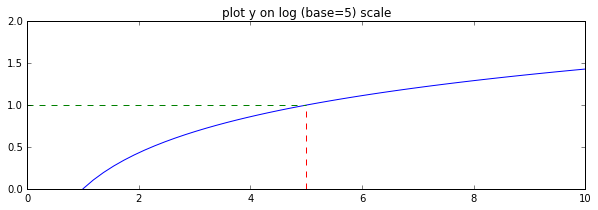

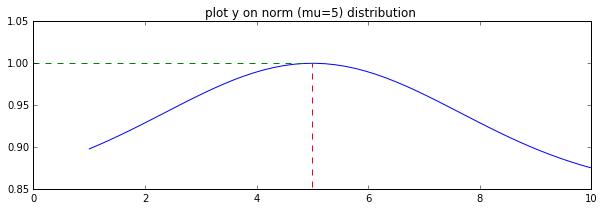

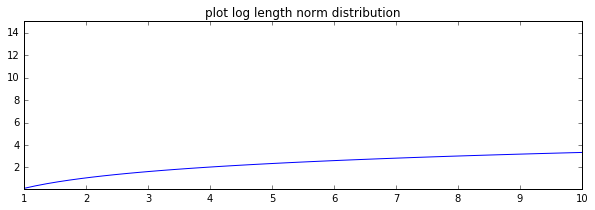

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

# set mean of terms size distribution
mu = 5

# sample x dataset as term sizes from 1 - 10
x = np.linspace(1,10)
y = [math.log(x_i, mu) for x_i in x]

fig, ax = plt.subplots(figsize=(10,3))

ax.set_title("plot y on log (base=5) scale")
#ax.set_yscale("log")
ax.set_ylim([0, 2])
ax.plot(x,y) 

plt.plot((0, 5), (1, 1), '--')
plt.plot((5, 5), (0, 1), '--')

plt.show()

# try with norm distribution
# mu = np.mean(x)
mu = 5
sigma = np.std(x)
sum_x = sum(x)
min_x = min(x)
max_x = max(x)

#print(np.sqrt(2))

def probability_density(x_value, mu, sigma):
    pd = (1/(sigma * np.sqrt(2 * math.pi))) * math.exp(- math.pow((x_value - mu),2) / (2 * math.pow(sigma, 2)))
    return pd

norm_value = 1 - probability_density(mu, mu, sigma)

n_y = [probability_density(x_i, mu, sigma) + norm_value for x_i in x]

# print("prob of 5: ", probability_density(5, mu, sigma))

fig_2, ax_2 = plt.subplots(figsize=(10,3))

ax_2.set_title("plot y on norm (mu=5) distribution ")
#ax.set_yscale("log")
ax_2.set_ylim([0.85, 1.05])
ax_2.plot(x,n_y) 

plt.plot((0, 5), (1, 1), '--')
plt.plot((5, 5), (0, 1), '--')

plt.show()


log_len_norm_y = [math.log2(x_i + 0.1) for x_i in x]
fig_3, ax_3 = plt.subplots(figsize=(10,3))

ax_3.set_title("plot log length norm distribution")
#ax.set_yscale("log")
ax_3.set_ylim([0.1, 15])
ax_3.plot(x,log_len_norm_y) 

plt.show()

## Simple examples of MWT ranking

In [15]:
example_abstract_results_wc1, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="avg", top_p = 1, lemma=True)
print("Top 10 Keywords with 'avg': ", example_abstract_results_wc1[:10])

example_abstract_results_wc2, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_avg", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'norm_avg': ", example_abstract_results_wc2[:10])

example_abstract_results_wc3, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_avg", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_avg'(mu=3): ", example_abstract_results_wc3[:10])

example_abstract_results_wc4, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_avg", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_avg'(mu=3): ", example_abstract_results_wc4[:10])

example_abstract_results_wc5, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="len_log_norm_avg", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'len_log_norm_avg': ", example_abstract_results_wc5[:10])

example_abstract_results_wc6, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="sum", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'sum': ", example_abstract_results_wc6[:10])

example_abstract_results_wc7, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_sum", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'norm_sum': ", example_abstract_results_wc7[:10])

example_abstract_results_wc8, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_sum", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_sum'(mu=3): ", example_abstract_results_wc8[:10])

example_abstract_results_wc9, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_sum", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_sum'(mu=3): ", example_abstract_results_wc9[:10])

example_abstract_results_wc10, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="len_log_norm_sum", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'len_log_norm_sum': ", example_abstract_results_wc10[:10])

example_abstract_results_wc11, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="max", top_p = 1, lemma=True)
print("\nTop 10 Keywords with 'max': ", example_abstract_results_wc11[:10])

example_abstract_results_wc12, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'norm_max': ", example_abstract_results_wc12[:10])

example_abstract_results_wc13, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="log_norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'log_norm_max'(mu=3): ", example_abstract_results_wc13[:10])

example_abstract_results_wc14, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="gaussian_norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'gaussian_norm_max'(mu=3): ", example_abstract_results_wc14[:10])

example_abstract_results_wc15, example_abstract_top_vertices = keywords_extraction(example_abstract, weight_comb="len_log_norm_max", top_p = 1, mu=3, lemma=True)
print("\nTop 10 Keywords with 'len_log_norm_max': ", example_abstract_results_wc15[:10])

Top 10 Keywords with 'avg':  [('system', 0.09086), ('set', 0.07817), ('minimal set', 0.06832), ('type system', 0.06499), ('algorithm', 0.06389), ('minimal supporting set', 0.05896), ('linear diophantine equation', 0.05862), ('minimal', 0.05848), ('linear constraint', 0.04969), ('strict inequations', 0.04804)]

Top 10 Keywords with 'norm_avg':  [('system', 0.09086), ('set', 0.07817), ('algorithm', 0.06389), ('minimal', 0.05848), ('compatibility', 0.04458), ('solution', 0.04176), ('construction', 0.04171), ('type', 0.03911), ('minimal set', 0.03416), ('type system', 0.03249)]

Top 10 Keywords with 'log_norm_avg'(mu=3):  [('minimal set', 0.10829), ('type system', 0.103), ('system', 0.09086), ('linear constraint', 0.07876), ('set', 0.07817), ('strict inequations', 0.07614), ('corresponding algorithm', 0.07056), ('algorithm', 0.06389), ('nonstrict inequations', 0.06276), ('mixed type', 0.06199)]

Top 10 Keywords with 'gaussian_norm_avg'(mu=3):  [('system', 0.09031), ('set', 0.07769), ('algo

# Term extraction from corpus

'jgtextrank' can be applied to raw text corpus for corpus-level term extraction. Corpus-level term graph representation will be made and linearly expanded by merging individual vertex graph and their co-occurrences from all the context across the entire document set.

The implementation is memory-efficient and can be applied to large corpus. You can set available workers (CPU cores) to speed up the co-occurrence computation.

In [3]:
import logging.config
# log can be set up for corpus processing or for the debugging
logging.config.fileConfig(os.path.join('..', 'logging.conf'))
corpus_directory = os.path.join('GENIAcorpus302', 'text', 'files')

In [26]:
print("term extraction from corpus [%s] with pageRank metrics..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords, top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory, top_p=1, stop_words=stop_list,
                                                                     max_iter=1000, tol=1.0e-6, 
                                                                     lemma=True, weight_comb="norm_max",
                                                                     export=True, export_format="json", 
                                                                     export_path="textrank_genia.json",
                                                                     workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", keywords[:50])
print("\n")
print("top 50 vertices: ", top_t_vertices[:50])

term extraction from corpus [GENIAcorpus302\text\files] with pageRank metrics...
2018-08-13 11:15:51,900 [MainThread  ] - textrank - INFO - computing vertices representations...
2018-08-13 11:18:05,378 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2018-08-13 11:18:11,454 [MainThread  ] - textrank - DEBUG - top T(t=16121) vertices: [('cell', 0.012267871358133127), ('protein', 0.006821066185310318), ('gene', 0.0062500396747922566), ('expression', 0.005490770528247743), ('human', 0.0050934423716705755), ('activation', 0.004200811423588261), ('activity', 0.003986656587461902), ('factor', 0.003963569627782556), ('transcription', 0.0036417277399153317), ('receptor', 0.0035910084331549704)] ...
2018-08-13 11:18:11,493 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2018-08-13 11:21:57,151 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2018-08-13 11:21:57,406 [MainThread  ] - textrank - INFO - complete result export.

In [ ]:
print("term extraction from corpus [%s] with TeRGraph metrics..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
TeRGraph_keywords, TeRGraph_top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory, solver="TeRGraph",
                                                         top_p=1, stop_words=stop_list, lemma=True, weight_comb="norm_max",
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia_TeRGraph.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 TeRGraph keywords: ", TeRGraph_keywords[:50])
print("\n")
print("top 50 TeRGraph vertices: ", TeRGraph_top_t_vertices[:50])

In [ ]:
print("term extraction from corpus [%s] with degree centrality metrics..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
degree_centr_keywords, degree_centr_top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory, 
                                                                                               solver="degree_centrality",
                                                         top_p=1, stop_words=stop_list, lemma=True, weight_comb="norm_max",
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia_degree_centrality.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 degree centrality keywords: ", degree_centr_keywords[:50])
print("\n")
print("top 50 degree centrality vertices: ", degree_centr_top_t_vertices[:50])

In [ ]:
print("term extraction from corpus [%s] with hits metrics..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
hits_keywords, hits_top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory, solver="hits",
                                                                               max_iter=1000, tol=1.0e-8,
                                                         top_p=1, stop_words=stop_list, lemma=True, weight_comb="norm_max",
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia_hits.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 hits keywords: ", hits_keywords[:50])
print("\n")
print("top 50 hits vertices: ", hits_top_t_vertices[:50])

In [ ]:
print("term extraction from corpus [%s] with katz centrality metrics..." % corpus_directory)
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
katz_keywords, katz_top_t_vertices = keywords_extraction_from_corpus_directory(corpus_directory, 
                                                                               solver="katz_centrality", 
                                                                               max_iter=5000, tol=1.0e-6,
                                                         top_p=1, stop_words=stop_list, lemma=True, weight_comb="norm_max",                                                                               
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia_katz.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 katz centrality keywords: ", katz_keywords[:50])
print("\n")
print("top 50 katz centrality vertices: ", katz_top_t_vertices[:50])

Evaluation of the result with reference set:

In [4]:
from example_utility import load_genia_gs_terms, normalise_term, term_precision, term_recall,f1_score
gs_terms = load_genia_gs_terms('genia_gs_terms.txt')

load and normalise GENIA gs term list from [genia_gs_terms.txt]
initially loaded gs terms size:  35800
normalised gs terms loaded.


In [5]:
def evaluate_results(result_terms, gs_terms, solver_algorithm):
    print("\nEvaluation Result of %s: " % solver_algorithm)
    print("\n")
    all_norm_terms = [normalise_term(weighted_term[0]) for weighted_term in result_terms]
    
    overall_precision = term_precision(gs_terms, set(all_norm_terms))
    print("overall precision: ", overall_precision)
    overall_recall = term_recall(gs_terms, set(all_norm_terms))
    print("overall recall: ", overall_recall)
    overall_f1 = f1_score(overall_precision, overall_recall)
    print("overall F1 score: ", overall_f1)
    
    top_200_precision = term_precision(gs_terms, set(all_norm_terms[:200]))
    print("top_200_precision: ", top_200_precision)
    top_500_precision = term_precision(gs_terms, set(all_norm_terms[:500]))
    print("top_500_precision: ", top_500_precision)
    top_1000_precision = term_precision(gs_terms, set(all_norm_terms[:1000]))
    print("top_1000_precision: ", top_1000_precision)
    top_2000_precision = term_precision(gs_terms, set(all_norm_terms[:2000]))
    print("top_2000_precision: ", top_2000_precision)
    top_3000_precision = term_precision(gs_terms, set(all_norm_terms[:3000]))
    print("top_3000_precision: ", top_3000_precision)
    top_5000_precision = term_precision(gs_terms, set(all_norm_terms[:5000]))
    print("top_5000_precision: ", top_5000_precision)


In [24]:
evaluate_results(keywords, gs_terms, "pagerank")

evaluate_results(TeRGraph_keywords, gs_terms, "TeRGraph")

evaluate_results(degree_centr_keywords, gs_terms, "Degree Centrality")

evaluate_results(hits_keywords, gs_terms, "hits")

evaluate_results(katz_keywords, gs_terms, "katz centrality")


Evaluation Result of pagerank: 


overall precision:  0.4158849149845046
overall recall:  0.653
top_200_precision:  0.7
top_500_precision:  0.6686746987951807
top_1000_precision:  0.6167002012072434
top_2000_precision:  0.5742325113236034
top_3000_precision:  0.5924806982208795
top_5000_precision:  0.5481272654047523

Evaluation Result of TeRGraph: 


overall precision:  0.4158849149845046
overall recall:  0.653
top_200_precision:  0.455
top_500_precision:  0.44889779559118237
top_1000_precision:  0.45875251509054327
top_2000_precision:  0.4657258064516129
top_3000_precision:  0.4740740740740741
top_5000_precision:  0.5023312385972025

Evaluation Result of Degree Centrality: 


overall precision:  0.4158849149845046
overall recall:  0.653
top_200_precision:  0.7
top_500_precision:  0.6686746987951807
top_1000_precision:  0.6187122736418511
top_2000_precision:  0.5742325113236034
top_3000_precision:  0.6073825503355704
top_5000_precision:  0.5492050714429463

Evaluation Result of hits:

# Evaluate KEA with Inspec dataset (Hulth, 2003)

In [2]:
import os, time
from jgtextrank import keywords_extraction_from_tagged_corpus
from example_utility import pre_processing_corpus_with_spacy

hulth2003_corpus_directory = os.path.join('Hulth2003', 'Test')
# pre-processing raw corpus with spaCy library
pre_processed_hulth2003_corpus = pre_processing_corpus_with_spacy(hulth2003_corpus_directory, 
                                                                  encoding="utf-8", lemma=True, default_file_suffix=".abstr")

print("term extraction from spaCy pre-processed hulth2003 corpus [%s] ..." % hulth2003_corpus_directory)

start = time.time()


hulth2003_keywords_spacy, hulth2003_top_t_vertices_spacy = keywords_extraction_from_tagged_corpus(pre_processed_hulth2003_corpus,
                                                                                                  window=2,
                                                                  top_p = 1, stop_words=stop_list,
                                                                  weight_comb="norm_max",
                                                                  export=True, export_format="json",
                                                                  export_path="textrank_genia_spacy.json",
                                                                  workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", hulth2003_keywords_spacy[:50])
print("\n")
print("top 100 vertices: ", hulth2003_top_t_vertices_spacy[:100])

term extraction from spaCy pre-processed hulth2003 corpus [Hulth2003\Test] ...


Complete. Wall-clock elapsed time:  63.46142864227295 s


top 50 keywords:  [('system', 0.00885), ('model', 0.00643), ('base', 0.00639), ('datum', 0.00483), ('system design', 0.00443), ('time system', 0.00443), ('cctv system', 0.00443), ('hvdc system', 0.00443), ('mapping system', 0.00443), ('modal system', 0.00443), ('system status', 0.00443), ('cad system', 0.00443), ('dialogue system', 0.00443), ('drive system', 0.00443), ('base system', 0.00443), ('image system', 0.00443), ('numerical system', 0.00443), ('autonomous system', 0.00443), ('system risk', 0.00443), ('hiding system', 0.00443), ('flexible system', 0.00443), ('pv system', 0.00443), ('hybrid system', 0.00443), ('information system', 0.00443), ('elliptic system', 0.00443), ('cost system', 0.00443), ('ilp system', 0.00443), ('molecular system', 0.00443), ('power system', 0.00443), ('heat system', 0.00443), ('aware system', 0.00443), ('usable syst

In [7]:
from example_utility import load_Hulth2003_gs_terms
    
hulth2003_gs_terms = load_Hulth2003_gs_terms(hulth2003_corpus_directory)
print("%s total normalised Inspec gs terms loaded "%len(hulth2003_gs_terms))

evaluate_results(hulth2003_keywords_spacy, hulth2003_gs_terms, "TextRank+Inspec")

initially loaded gs terms size:  3893
normalised gs terms loaded.
3750 total normalised Inspec gs terms loaded 

Evaluation Result of TextRank+Inspec: 


overall precision:  0.11068662880743417
overall recall:  0.286
top_200_precision:  0.135
top_500_precision:  0.108
top_1000_precision:  0.117
top_2000_precision:  0.118
top_3000_precision:  0.11466666666666667
top_5000_precision:  0.115


# Evaluate KEA with [SemEval 2017 Task 10 testset](https://scienceie.github.io/task.html) (Subtask(A))

See competition Subtask(A) results presented in (Augenstein et al., 2017)

Augenstein, I., Das, M., Riedel, S., Vikraman, L., & McCallum, A. (2017). Semeval 2017 task 10: Scienceie-extracting keyphrases and relations from scientific publications. arXiv preprint [arXiv:1704.02853](https://arxiv.org/pdf/1704.02853.pdf).

In [6]:
from jgtextrank import keywords_extraction_from_tagged_corpus
from example_utility import load_scienceie_test_dataset,pre_processing_corpus_with_spacy

In [7]:
semeval_testset_gs_terms = load_scienceie_test_dataset("semeval_articles_test", file_suffix=".ann")

initially loaded gs terms size:  2052
normalised gs terms loaded.


In [8]:
semeval2017_pre_processed_corpus = pre_processing_corpus_with_spacy("semeval_articles_test", default_file_suffix=".txt")
print("term extraction from spaCy pre-processed Semeval 2017 testset [%s] ..." % "/semeval_articles_test")
start = time.time()
semeval2017_keywords, semeval2017_top_vertices = keywords_extraction_from_tagged_corpus(semeval2017_pre_processed_corpus, window=3,
                                                                                                          top_p = 1, stop_words=stop_list,
                                                                                                          weight_comb="norm_max",
                                                                                                          export=True, export_format="json",
                                                                                                          export_path="textrank_semeval2017.json",
                                                                                                          workers=multiprocessing.cpu_count())
end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", semeval2017_keywords[:50])
print("\n")
print("top 100 vertices: ", semeval2017_top_vertices[:100])

term extraction from spaCy pre-processed Semeval 2017 testset [/semeval_articles_test] ...
2018-08-21 12:36:15,626 [MainThread  ] - textrank - INFO - computing vertices representations...
2018-08-21 12:36:18,593 [MainThread  ] - textrank - INFO - total size of vertices: 2682
2018-08-21 12:36:19,307 [MainThread  ] - textrank - DEBUG - top T(t=2682) vertices: [('model', 0.007207575350863577), ('surface', 0.004618955073473277), ('datum', 0.004592768903741177), ('method', 0.0045892321381295524), ('high', 0.004412607792524416), ('system', 0.004321709473254827), ('al', 0.004015304235229525), ('base', 0.0038751940287239783), ('time', 0.0038633563843391014), ('result', 0.0030883670257871986)] ...
2018-08-21 12:36:19,310 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2018-08-21 12:36:19,989 [MainThread  ] - textrank - INFO - done.
2018-08-21 12:36:19,993 [MainThread  ] - textrank - INFO - MWTs weighing ...
2018-08-21 12:36:20,284 [MainThread  ] - textrank - INFO - done.
2018-

In [9]:
evaluate_results(semeval2017_keywords, semeval_testset_gs_terms, "pagerank on Semeval 2017 testset")


Evaluation Result of pagerank on Semeval 2017 testset: 


overall precision:  0.19011846287200232
overall recall:  0.402
overall F1 score:  0.258149768557601
top_200_precision:  0.19
top_500_precision:  0.162
top_1000_precision:  0.156
top_2000_precision:  0.1765
top_3000_precision:  0.187729243081027
top_5000_precision:  0.19011846287200232


## weight  MWTs with 'log_max_norm' :

In [10]:
print("\n")
print("start term extraction with 'log_norm_max' (mu=3) for MWT terms ...")
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords_log_norm, top_t_vertices_log_norm = keywords_extraction_from_corpus_directory(corpus_directory,
                                                         top_p=1, stop_words=stop_list,
                                                         lemma=True, weight_comb="log_norm_max", mu=3,
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 30 keywords: ", keywords_log_norm[:30])
# print("\n")
# print("top 100 vertices: ", top_t_vertices[:100])

evaluate_results(keywords_log_norm, gs_terms, "GENIA+pagerank+'log_norm_max' (mu=3)")



start term extraction with 'log_norm_max' (mu=3) for MWT terms ...
2018-08-13 10:15:00,146 [MainThread  ] - textrank - INFO - computing vertices representations...
2018-08-13 10:17:02,228 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2018-08-13 10:17:06,768 [MainThread  ] - textrank - DEBUG - top T(t=16121) vertices: [('cell', 0.02394811040346397), ('protein', 0.01221977599400581), ('gene', 0.01003047832341601), ('expression', 0.0072862302133828005), ('human', 0.00652440840112107), ('factor', 0.00612207339814623), ('activity', 0.005721538282275168), ('site', 0.005637743567407804), ('activation', 0.005599643960173466), ('receptor', 0.005050309207558882)] ...
2018-08-13 10:17:06,797 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2018-08-13 10:20:41,535 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2018-08-13 10:20:41,719 [MainThread  ] - textrank - INFO - complete result export.


Complete. Wall-clock elaps

## weight  MWTs with "gaussian_norm_max"

In [11]:
print("\n")
print("start term extraction with 'gaussian_norm_max' (mu=5) for MWT terms ...")
start = time.time()

# "T is set to a third of the number of vertices in the graph"
# 'workers' is set to use all the available cpu cores
keywords_log_norm, top_t_vertices_log_norm = keywords_extraction_from_corpus_directory(corpus_directory,
                                                         top_p=1, stop_words=stop_list,
                                                         lemma=True, weight_comb="gaussian_norm_max", mu=5,
                                                         export=True, export_format="json",
                                                         export_path="textrank_genia.json",
                                                         workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 30 keywords: ", keywords_log_norm[:30])
# print("\n")
# print("top 100 vertices: ", top_t_vertices[:100])

evaluate_results(keywords_log_norm, gs_terms, "GENIA+pagerank+'gaussian_norm_max' (mu=5)")



start term extraction with 'gaussian_norm_max' (mu=5) for MWT terms ...
2018-08-13 10:22:48,225 [MainThread  ] - textrank - INFO - computing vertices representations...
2018-08-13 10:24:42,119 [MainThread  ] - textrank - INFO - total size of vertices: 16121
2018-08-13 10:24:45,784 [MainThread  ] - textrank - DEBUG - top T(t=16121) vertices: [('cell', 0.02394811040346397), ('protein', 0.01221977599400581), ('gene', 0.01003047832341601), ('expression', 0.0072862302133828005), ('human', 0.00652440840112107), ('factor', 0.00612207339814623), ('activity', 0.005721538282275168), ('site', 0.005637743567407804), ('activation', 0.005599643960173466), ('receptor', 0.005050309207558882)] ...
2018-08-13 10:24:45,821 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2018-08-13 10:28:24,371 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia.json]
2018-08-13 10:28:24,510 [MainThread  ] - textrank - INFO - complete result export.


Complete. Wall-clock 

# Term extraction from pre-tagged corpus

Following example shows how to pre-process the corpus with [spaCy](https://spacy.io/).

To run the following demo, you need to :

    1) install spaCy ('pip install spacy');
    
    2) download the corresponding language model (e.g., 'python -m spacy download en');

In [4]:
from jgtextrank import keywords_extraction_from_tagged_corpus
from example_utility import pre_processing_corpus_with_spacy

In [12]:
corpus_directory = os.path.join('GENIAcorpus302', 'text', 'files')
# pre-processing raw corpus with spaCy library
pre_processed_corpus = pre_processing_corpus_with_spacy(corpus_directory, encoding="utf-8", lemma=True)

print("term extraction from spaCy pre-processed corpus [%s] ..." % corpus_directory)

# PoS tagging can be erroneous with domain-specific corpus. Custom stop list can be applied to improve precision
# stop_list = stop_list + ["regulate", "show", "activate", "express", "increase", "increased", "target", "demonstrate", "mimic", "exert", "acute"]

start = time.time()


keywords_spacy, top_t_vertices_spacy = keywords_extraction_from_tagged_corpus(pre_processed_corpus, window=2,
                                                                  top_p = 1, stop_words=stop_list,
                                                                  weight_comb="norm_max",
                                                                  export=True, export_format="json",
                                                                  export_path="textrank_genia_spacy.json",
                                                                  workers=multiprocessing.cpu_count())

end = time.time()

print("\n")
print("Complete. Wall-clock elapsed time: ", end - start, "s")
print("\n")
print("top 50 keywords: ", keywords_spacy[:50])
print("\n")
print("top 100 vertices: ", top_t_vertices_spacy[:100])


term extraction from spaCy pre-processed corpus [GENIAcorpus302\text\files] ...
2018-08-13 10:34:03,817 [MainThread  ] - textrank - INFO - computing vertices representations...
2018-08-13 10:35:35,839 [MainThread  ] - textrank - INFO - total size of vertices: 11302
2018-08-13 10:35:40,873 [MainThread  ] - textrank - DEBUG - top T(t=11302) vertices: [('cell', 0.011765527895880404), ('protein', 0.00607315878955655), ('gene', 0.005524051598259978), ('expression', 0.0054047030523445795), ('human', 0.0051840333809123175), ('induce', 0.004941490302755386), ('show', 0.0039055513706425585), ('bind', 0.0038970284444386034), ('activation', 0.003893881799040415), ('activity', 0.0038252712325945568)] ...
2018-08-13 10:35:40,903 [MainThread  ] - textrank - INFO - collapse adjacent keywords ...
2018-08-13 10:38:17,788 [MainThread  ] - textrank - INFO - exporting sorted keywords into [textrank_genia_spacy.json]
2018-08-13 10:38:18,159 [MainThread  ] - textrank - INFO - complete result export.


Compl

Evaluation of the result with reference set:

In [13]:
evaluate_results(keywords_spacy, gs_terms, "GENIA+pagerank+ spaCy pre-processed dataset")


Evaluation Result of GENIA+pagerank+ spaCy pre-processed dataset: 


overall precision:  0.34395678911310124
overall recall:  0.484
top_200_precision:  0.585
top_500_precision:  0.5551102204408818
top_1000_precision:  0.5
top_2000_precision:  0.45841683366733466
top_3000_precision:  0.44837955228867354
top_5000_precision:  0.3997192137986362
